<a href="https://colab.research.google.com/github/RafsanJany-44/Research_Sleep_Stage_Classification/blob/main/ANN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
#Loading Dataset
data = pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv")

In [3]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

In [4]:
#Encoding Categorical the sleep_stage
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
Y = np.array(LE1.fit_transform(Y))

In [5]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [6]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
len(X_train)

86760

In [9]:
len(X_test)

21691

In [10]:
X_train.shape


(86760, 215)

In [12]:
'''model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(215,), activation='relu'), # input layer
    keras.layers.Dense(350, activation='sigmoid'),
    keras.layers.Dense(250, activation='sigmoid'),
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])'''

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(215,), activation='relu'), # input layer
    #keras.layers.Dense(350, activation='sigmoid'),
    #keras.layers.Dense(250, activation='sigmoid'),
    keras.layers.Dense(75, activation='sigmoid'),
    keras.layers.Dense(25, activation='softmax')                    # output layer
])




model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

Epoch 1/150
2712/2712 [==============================] - 6s 2ms/step - loss: 0.9402 - accuracy: 0.6302
Epoch 2/150
2712/2712 [==============================] - 6s 2ms/step - loss: 0.7863 - accuracy: 0.6860
Epoch 3/150
2712/2712 [==============================] - 6s 2ms/step - loss: 0.7482 - accuracy: 0.7021
Epoch 4/150
2712/2712 [==============================] - 6s 2ms/step - loss: 0.7215 - accuracy: 0.7139
Epoch 5/150
2712/2712 [==============================] - 6s 2ms/step - loss: 0.6997 - accuracy: 0.7219
Epoch 6/150
2712/2712 [==============================] - 6s 2ms/step - loss: 0.6802 - accuracy: 0.7298
Epoch 7/150
2712/2712 [==============================] - 6s 2ms/step - loss: 0.6663 - accuracy: 0.7351
Epoch 8/150
2712/2712 [==============================] - 6s 2ms/step - loss: 0.6526 - accuracy: 0.7408
Epoch 9/150
2712/2712 [==============================] - 6s 2ms/step - loss: 0.6405 - accuracy: 0.7465
Epoch 10/150
2712/2712 [==============================] - 6s 2ms/step - l

In [13]:
model.evaluate(X_test, y_test)

678/678 [==============================] - 1s 1ms/step - loss: 0.8518 - accuracy: 0.7290


[0.8518000245094299, 0.7290120124816895]

<h3>Now we try to draw the Confusion matrix</h3>
<p>Here, the NN will predict the test data considering each of the neurons. So, we need to find out the best neuron which is giving us the highest prediction.
    <br> In this case we have to use the argmax() function for those neurons. </p>

In [14]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))

[[ 797  661   17  352  541]
 [ 397 6084  788  395  227]
 [  13  822 3371   16   32]
 [ 299  502   24 2451   98]
 [ 375  203   22   94 3110]]
              precision    recall  f1-score   support

           0       0.42      0.34      0.38      2368
           1       0.74      0.77      0.75      7891
           2       0.80      0.79      0.80      4254
           3       0.74      0.73      0.73      3374
           4       0.78      0.82      0.80      3804

    accuracy                           0.73     21691
   macro avg       0.69      0.69      0.69     21691
weighted avg       0.72      0.73      0.72     21691

Accurecy:  0.7290120326402656


**Now we need to draw the confusion matrix to show where our model is doing mistakes**
<br>
<br>
***Tensorflow has its own confusion matrix function where "labels" is the truth data and "predictions" is the predicted data***

In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

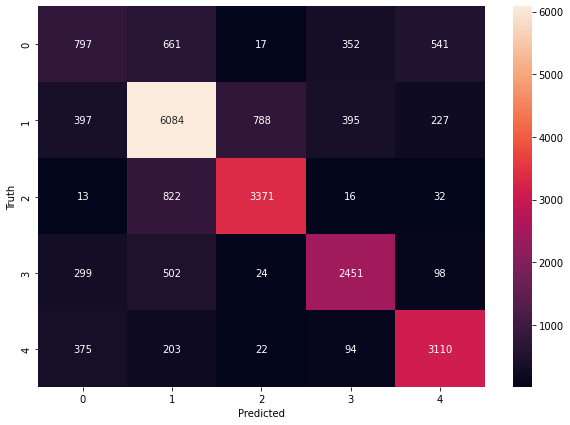

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted')
plt.ylabel('Truth')